In [1]:
from neural_net_utils import *
from feature_selection_utils import *
from supervised_utils import *

### Feature selection per il task di regressione

In [ ]:
df = pd.read_csv("../data/movies_features_reg_last30.csv")
cols = {
    "target": "score",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la regressione (con MSE 0.4649)
best_model = joblib.load("models/Random_Forest_Regressor-v2.joblib")

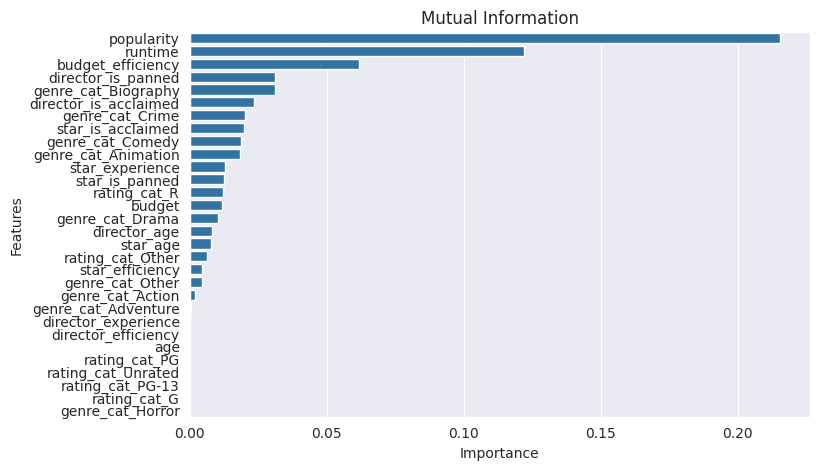

,feature,importance
2,popularity,0.215477
1,runtime,0.121898
4,budget_efficiency,0.061929
8,director_is_panned,0.031230
24,genre_cat_Biography,0.031158
7,director_is_acclaimed,0.023362
26,genre_cat_Crime,0.020111
12,star_is_acclaimed,0.019771
25,genre_cat_Comedy,0.018961
23,genre_cat_Animation,0.018393


In [15]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="regression").head(15)

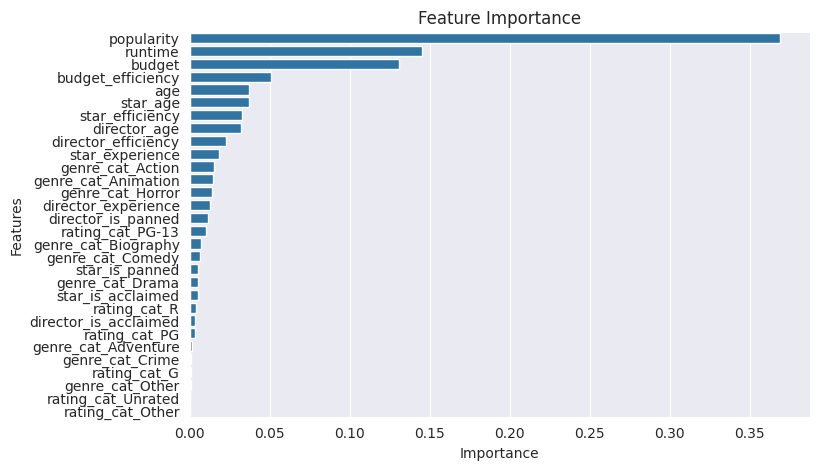

,feature,importance
2,popularity,0.369045
1,runtime,0.145549
3,budget,0.131223
4,budget_efficiency,0.050769
0,age,0.037411
10,star_age,0.037062
14,star_efficiency,0.032572
5,director_age,0.032089
9,director_efficiency,0.022551
11,star_experience,0.018591


In [16]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="regression").head(15)

In [ ]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, k_features=15, task="regression")

### Feature selection per il task di classificazione

In [2]:
df = pd.read_csv("../data/movies_features_cls_last30.csv")
cols = {
    "target": "budget_efficiency_cat",
    "drop": ["id", "title"],
    "dummies": ["rating_cat", "genre_cat"],
    "labels": [],
    "standardize": ["runtime", "director_age", "star_age"],
    "minmax": ["popularity", "budget", "director_experience", "star_experience"]
}
# carico il modello migliore per la classificazione (con accuracy 62.84%)
best_model = joblib.load("models/XGBoost_Classifier-v2(resampled).joblib")

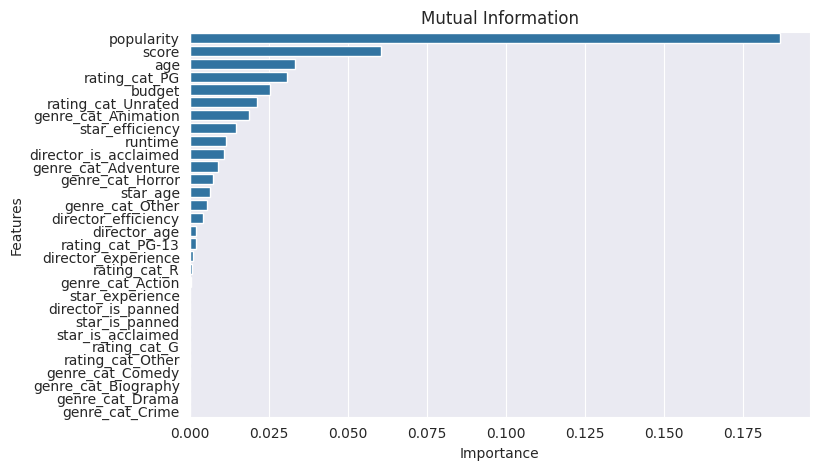

,feature,importance
2,popularity,0.186799
3,score,0.060659
0,age,0.033467
17,rating_cat_PG,0.030987
4,budget,0.025461
20,rating_cat_Unrated,0.021439
23,genre_cat_Animation,0.018672
14,star_efficiency,0.014859
1,runtime,0.011537
7,director_is_acclaimed,0.010917


In [3]:
# Visualizzo la mutual information delle features (Top 15)
plot_mutual_information(df, cols, task="classification").head(15)

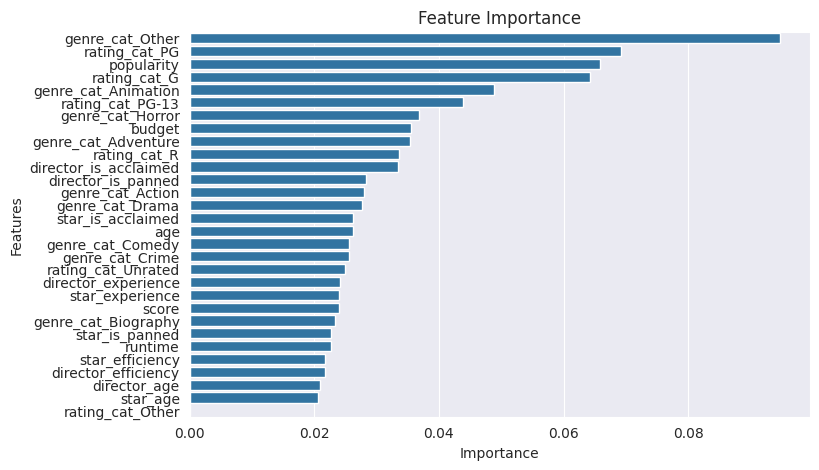

,feature,importance
29,genre_cat_Other,0.094718
17,rating_cat_PG,0.069181
2,popularity,0.065779
15,rating_cat_G,0.064175
23,genre_cat_Animation,0.048791
18,rating_cat_PG-13,0.043789
28,genre_cat_Horror,0.036737
4,budget,0.035585
22,genre_cat_Adventure,0.035287
19,rating_cat_R,0.033672


In [4]:
# Visualizzo l'importanza delle features (Top 15)
plot_feature_importances(df, cols, best_model, task="classification").head(15)

In [ ]:
# Eseguo la manual forward selection per ottenere una top 15
manual_forward_selection(df, cols, k_features=15, task="classification")